In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [13]:
import numpy as np

In [2]:
X, y = make_circles(15000, noise=0.04, random_state=42)
X

array([[-0.791265  , -0.11993781],
       [ 0.65942603, -0.72849579],
       [ 0.06939808, -0.7839774 ],
       ...,
       [-0.20948612, -0.91566117],
       [ 0.72041292,  0.68990366],
       [ 0.91123779, -0.22257126]])

In [3]:
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1], "label":y})
circles

,X0,X1,label
0,-0.791265,-0.119938,1
1,0.659426,-0.728496,0
2,0.069398,-0.783977,1
3,0.711577,0.606883,0
4,0.290970,-0.965372,0
...,...,...,...
14995,-0.371576,-0.958663,0
14996,0.179634,-0.753407,1
14997,-0.209486,-0.915661,0
14998,0.720413,0.689904,0


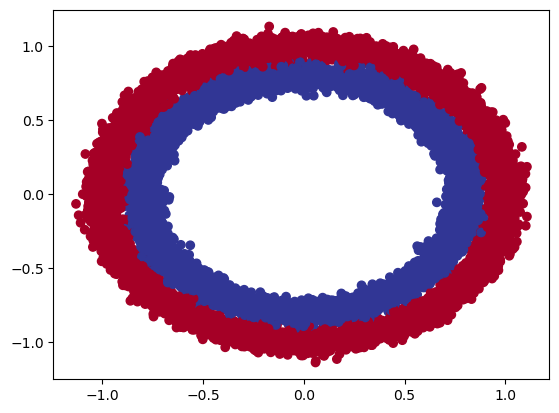

In [4]:
plt.scatter(circles["X0"], circles["X1"], c=y, cmap=plt.cm.RdYlBu)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, circles["label"], test_size=0.3, random_state=42)
print({"X_train.shape":X_train.shape}, {"X_test.shape":X_test.shape})

{'X_train.shape': (10500, 2)} {'X_test.shape': (4500, 2)}


In [6]:
X_train.shape, X_test.shape

((10500, 2), (4500, 2))

In [7]:
tf.random.set_seed(42)
# creat the model
overfit_model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="sigmoid"),
    tf.keras.layers.Dense(1)
])

# compile the model
overfit_model.compile(loss=tf.keras.losses.binary_focal_crossentropy,
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                      metrics=tf.keras.metrics.binary_focal_crossentropy)

In [8]:
tf.random.set_seed(42)
# fit the model
history = overfit_model.fit(X_train, y_train, epochs=30, validation_split=0.1, verbose=1)

Epoch 1/30
296/296 [==============================] - 2s 3ms/step - loss: 0.1210 - binary_focal_crossentropy: 0.1210 - val_loss: 0.0142 - val_binary_focal_crossentropy: 0.0142
Epoch 2/30
296/296 [==============================] - 1s 2ms/step - loss: 0.0128 - binary_focal_crossentropy: 0.0128 - val_loss: 0.0080 - val_binary_focal_crossentropy: 0.0080
Epoch 3/30
296/296 [==============================] - 1s 2ms/step - loss: 0.0361 - binary_focal_crossentropy: 0.0361 - val_loss: 0.0132 - val_binary_focal_crossentropy: 0.0132
Epoch 4/30
296/296 [==============================] - 1s 2ms/step - loss: 0.0103 - binary_focal_crossentropy: 0.0103 - val_loss: 0.0083 - val_binary_focal_crossentropy: 0.0083
Epoch 5/30
296/296 [==============================] - 1s 2ms/step - loss: 0.0078 - binary_focal_crossentropy: 0.0078 - val_loss: 0.0068 - val_binary_focal_crossentropy: 0.0068
Epoch 6/30
296/296 [==============================] - 1s 2ms/step - loss: 0.0170 - binary_focal_crossentropy: 0.0170 - v

<Axes: >

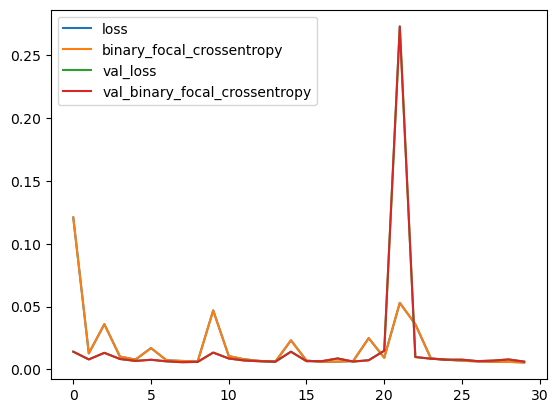

In [9]:
pd.DataFrame(history.history).plot()

In [10]:
overfit_model.evaluate(X_test, y_test)

141/141 [==============================] - 0s 1ms/step - loss: 0.0051 - binary_focal_crossentropy: 0.0051


[0.0051466962322592735, 0.0051466962322592735]

In [11]:
y_predic = overfit_model.predict(X_test)

141/141 [==============================] - 0s 1ms/step


In [16]:
x_min, x_max = min(X[:,0]), max(X[:,0])
y_min, y_max = min(X[:,1]), max(X[:,1])

xx, yy = np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000)
xx, yy = np.meshgrid(xx, yy)

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = overfit_model.predict(x_in)

31250/31250 [==============================] - 37s 1ms/step


In [18]:
y_pred = np.round(y_pred).reshape(xx.shape)

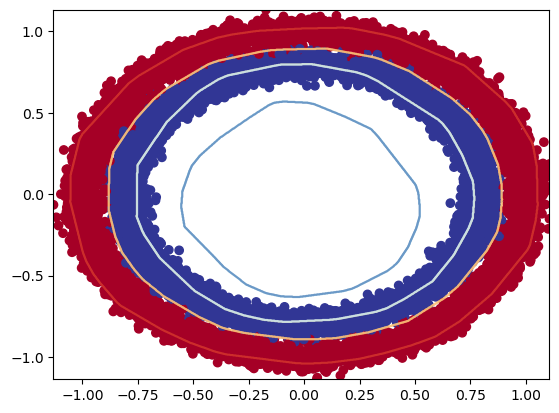

In [35]:
plt.contour(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [36]:
y_predicted = []

for i in y_predic:
  if i >=0.5:
    y_predicted.append(1)
  else:
    y_predicted.append(0)

array([[2234,    9],
       [  21, 2236]], dtype=int64)

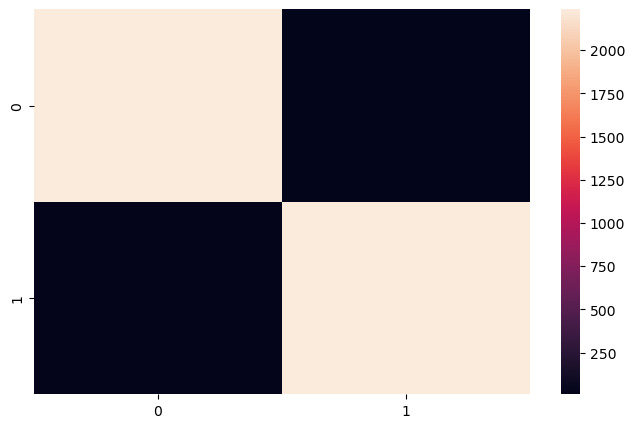

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(8,5))
sn.heatmap(cm, fmt="d", annot=None)
cm